Show an example of how rolling cadence changes the distribution of visits

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp
import lsst.sims.maf.db as db
import lsst.sims.maf.utils as utils
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metricBundles as metricBundles

In [2]:
outDir ='Rolling'
dbFile = 'ops2_1098_sqlite.db'
opsimdb = utils.connectOpsimDb(dbFile)
resultsDb = db.ResultsDb(outDir=outDir)
nightLimits = (np.arange(3)+1)*365
nightLimits = np.append(nightLimits, 3653.)
nside = 64

In [3]:
bundleList = []
plotDict ={}
sm = metrics.MedianMetric()
for night in nightLimits:
    metric = metrics.CountMetric(col='expMJD')
    slicer = slicers.HealpixSlicer(nside=nside,lonCol='ditheredRA',latCol='ditheredDec')
    sql = 'filter = "r" and night < %i' % night
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, plotDict=plotDict, summaryMetrics=sm))
    metric = metrics.InterNightGapsMetric(metricName='Median Inter-Night Gap')
    bundleList.append(metricBundles.MetricBundle(metric,slicer,sql, 
                                                 plotDict={'colorMin':0,'colorMax':30, 'xMin':0,'xMax':30}))

Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes
Healpix slicer using NSIDE=64, approximate resolution 54.967783 arcminutes


In [4]:
bd = metricBundles.makeBundlesDictFromList(bundleList)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database with constraint filter = "r" and night < 365
Found 51413 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_365_HEAL', 'opsim_Median_Inter-Night_Gap_r_and_night_lt_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 730
Found 108100 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_730_HEAL', 'opsim_Median_Inter-Night_Gap_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 1095
Found 158194 visits
Running:  ['opsim_Median_Inter-Night_Gap_r_and_night_lt_1095_HEAL', 'opsim_Count_expMJD_r_and_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 535139 visits
Running:  ['opsim_Median_Inter-Night_Gap_r_and_nig

Optimal bin calculation tried to make 652 bins, returning 200
Optimal bin calculation tried to make 1817 bins, returning 200



monopole: 16.4677  dipole: lon: -46.5211, lat: 79.0499, amp: 0.881225
Plotting complete.
Plotting figures with filter = "r" and night < 1095 sqlconstraint now.
monopole: 22.1345  dipole: lon: -165.39, lat: 85.9911, amp: 6.80146
monopole: 75.7337  dipole: lon: 54.094, lat: -41.677, amp: 12.6668
Plotting complete.

Optimal bin calculation tried to make 3307 bins, returning 200
Optimal bin calculation tried to make 12361 bins, returning 200



Plotting figures with filter = "r" and night < 3653 sqlconstraint now.
monopole: 28.3252  dipole: lon: -106.474, lat: 55.2723, amp: 8.36728
monopole: 228.478  dipole: lon: 70.8374, lat: -82.38, amp: 95.3618
Plotting complete.


/Users/yoachim/lsst/DarwinX86/anaconda/2.2.0/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


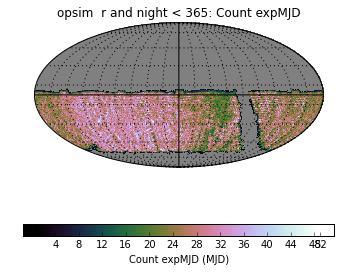

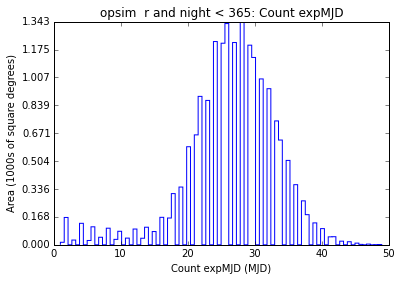

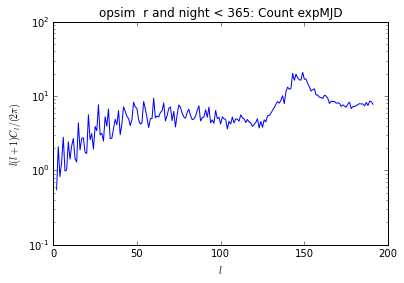

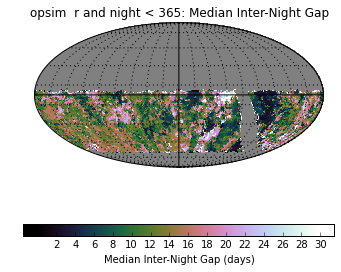

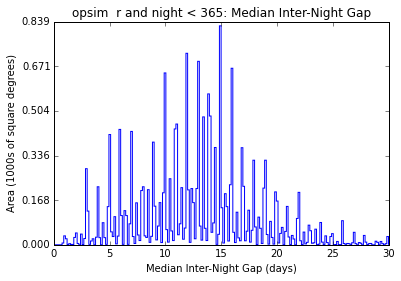

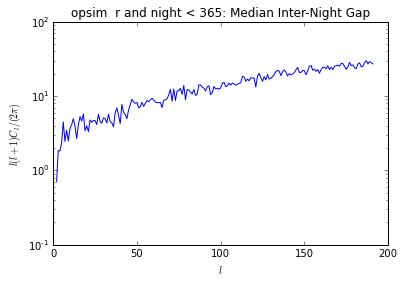

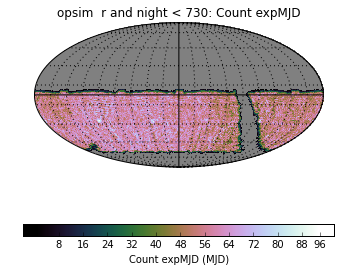

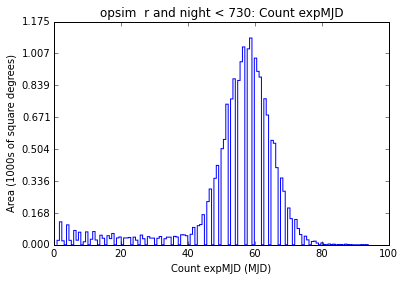

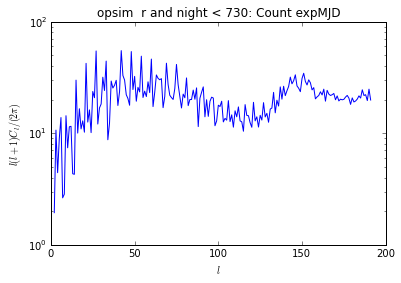

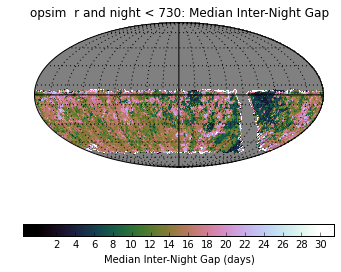

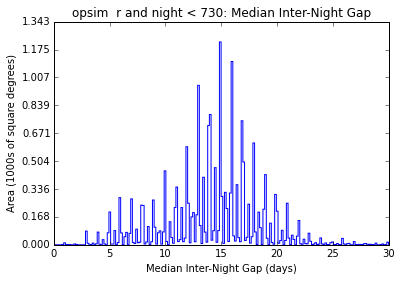

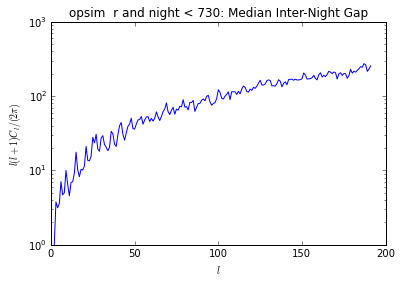

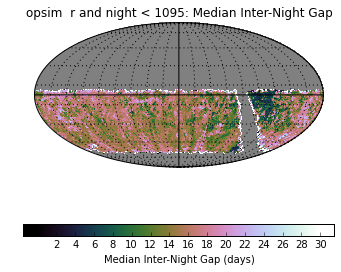

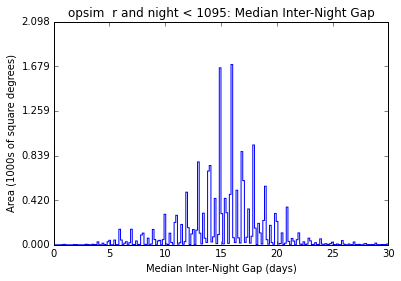

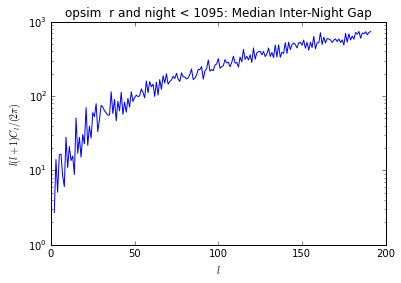

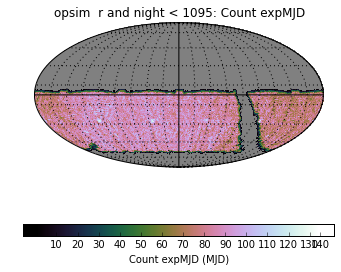

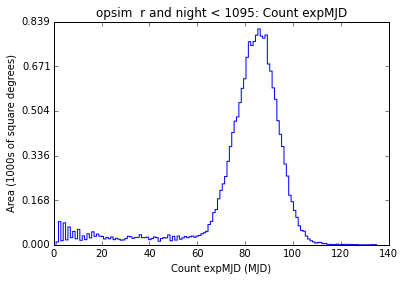

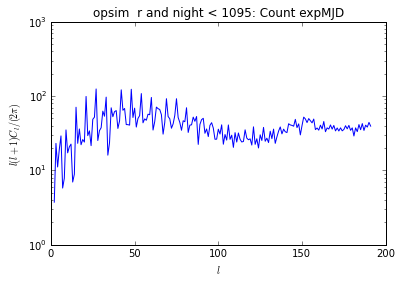

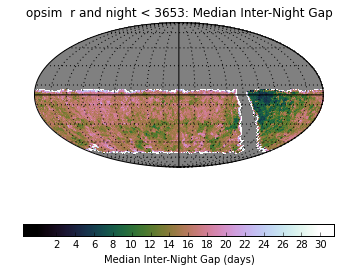

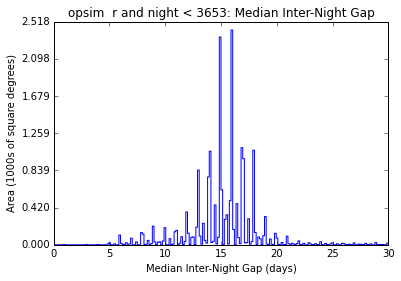

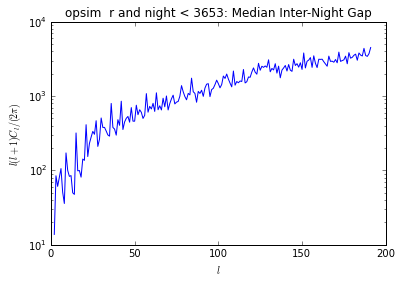

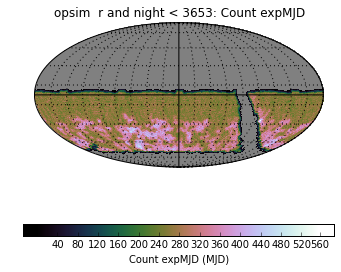

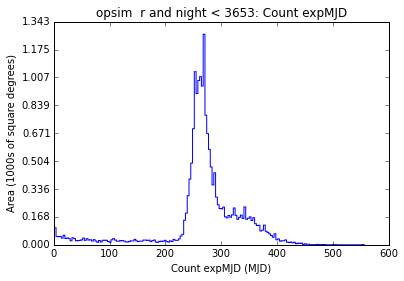

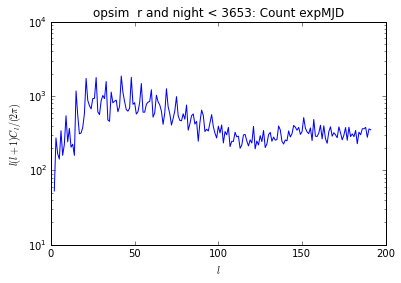

In [5]:
bg.runAll()
bg.plotAll(closefigs=False)

In [6]:
for bundle in bundleList:
    print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 27.0}
filter = "r" and night < 365 {}
filter = "r" and night < 730 {'Median': 57.0}
filter = "r" and night < 730 {}
filter = "r" and night < 1095 {'Median': 84.0}
filter = "r" and night < 1095 {}
filter = "r" and night < 3653 {'Median': 269.0}
filter = "r" and night < 3653 {}


In [7]:
dbFile = 'enigma_1260_sqlite.db' # Cheese2
opsimdb = utils.connectOpsimDb(dbFile)
bg =  metricBundles.MetricBundleGroup(bd, opsimdb,
                                      outDir=outDir, resultsDb=resultsDb)

Querying database with constraint filter = "r" and night < 365
Found 47053 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_365_HEAL', 'opsim_Median_Inter-Night_Gap_r_and_night_lt_365_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 730
Found 94629 visits
Running:  ['opsim_Count_expMJD_r_and_night_lt_730_HEAL', 'opsim_Median_Inter-Night_Gap_r_and_night_lt_730_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 1095
Found 140822 visits
Running:  ['opsim_Median_Inter-Night_Gap_r_and_night_lt_1095_HEAL', 'opsim_Count_expMJD_r_and_night_lt_1095_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Querying database with constraint filter = "r" and night < 3653
Found 469113 visits
Running:  ['opsim_Median_Inter-Night_Gap_r_and_nigh

Optimal bin calculation tried to make 316 bins, returning 200
Optimal bin calculation tried to make 795 bins, returning 200



monopole: 21.7308  dipole: lon: -123.775, lat: -23.8745, amp: 2.20322
Plotting complete.
Plotting figures with filter = "r" and night < 1095 sqlconstraint now.
monopole: 23.8491  dipole: lon: -112.637, lat: 16.8312, amp: 3.44967
monopole: 63.4868  dipole: lon: 68.8708, lat: -68.0637, amp: 19.0483
Plotting complete.

Optimal bin calculation tried to make 1329 bins, returning 200
Optimal bin calculation tried to make 6825 bins, returning 200



Plotting figures with filter = "r" and night < 3653 sqlconstraint now.
monopole: 33.6951  dipole: lon: -70.6994, lat: 59.6924, amp: 14.103
monopole: 203.705  dipole: lon: -153.837, lat: -87.8231, amp: 77.2009
Plotting complete.


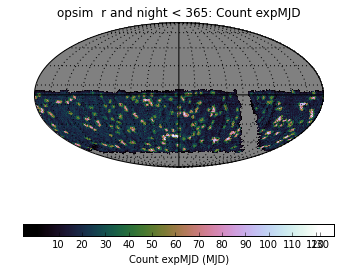

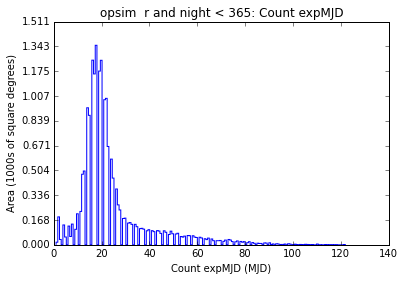

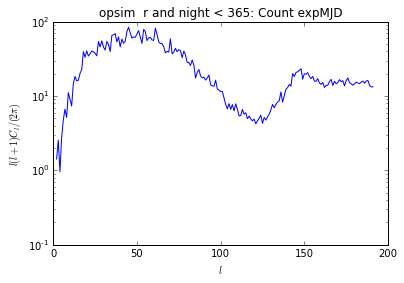

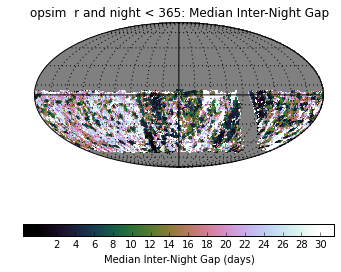

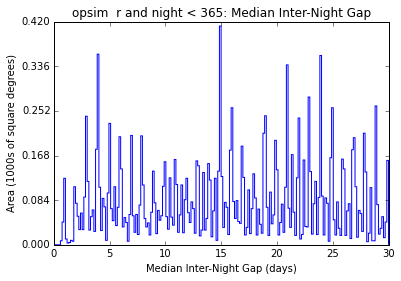

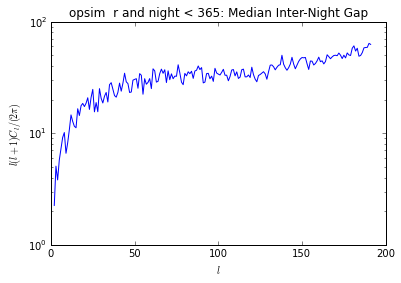

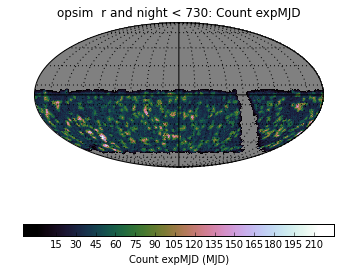

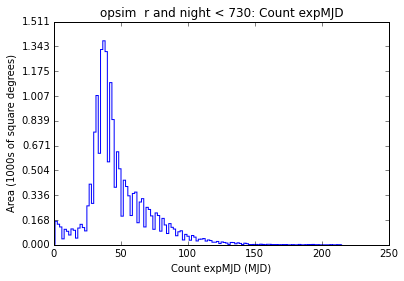

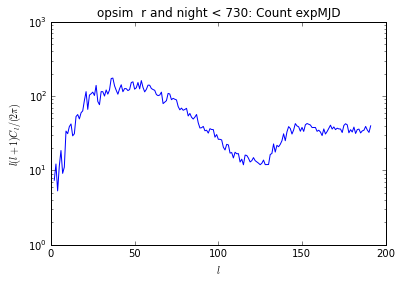

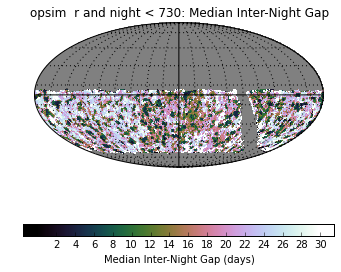

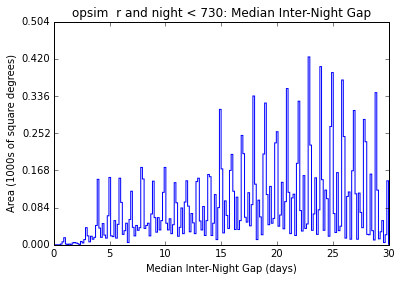

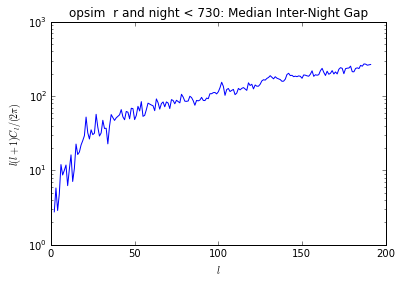

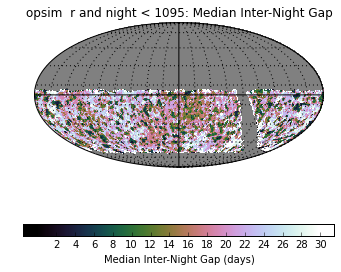

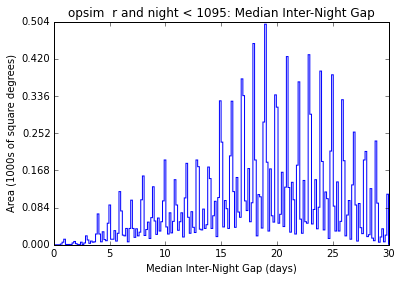

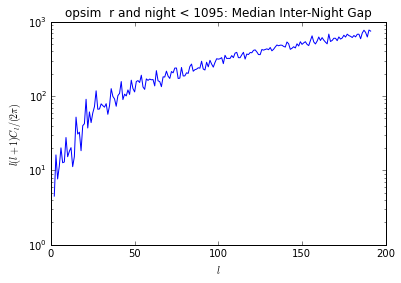

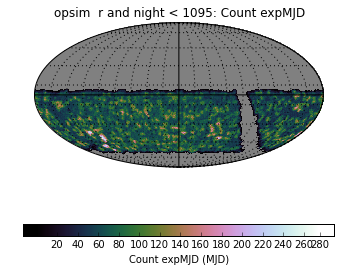

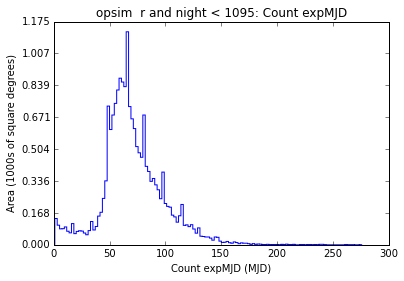

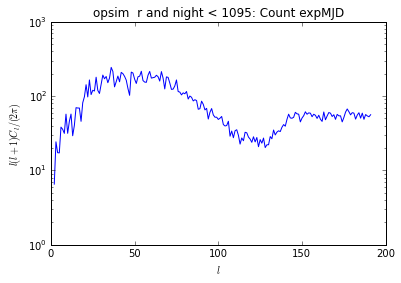

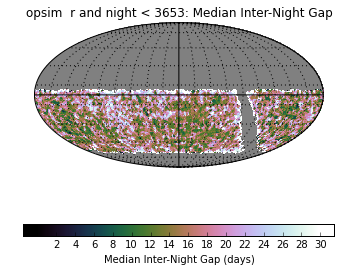

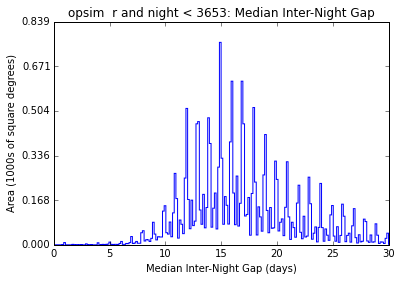

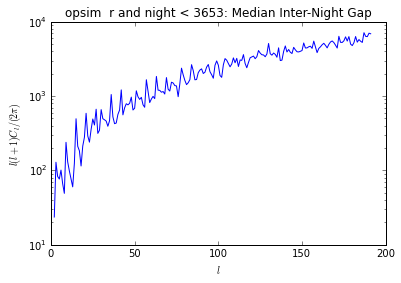

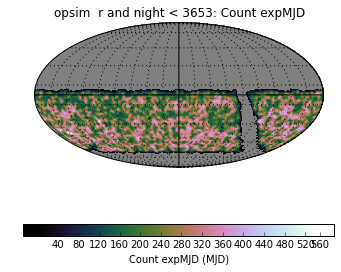

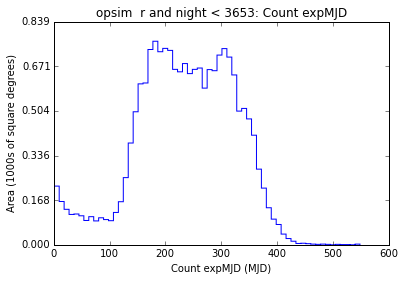

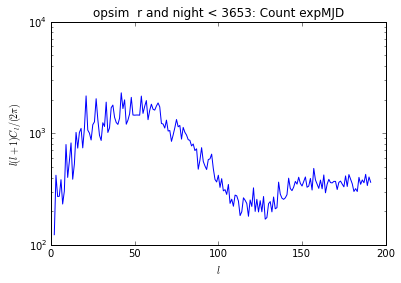

In [8]:
bg.runAll()
bg.plotAll(closefigs=False)

In [9]:
for bundle in bundleList:
    print bundle.sqlconstraint, bundle.summaryValues

filter = "r" and night < 365 {'Median': 20.0}
filter = "r" and night < 365 {}
filter = "r" and night < 730 {'Median': 42.0}
filter = "r" and night < 730 {}
filter = "r" and night < 1095 {'Median': 67.0}
filter = "r" and night < 1095 {}
filter = "r" and night < 3653 {'Median': 238.0}
filter = "r" and night < 3653 {}
